In [54]:
import pymc3 as pm

import numpy as np
import matplotlib.pyplot as plt
import spacepy.plot as spp
from scipy import stats
import pandas as pd

%matplotlib inline

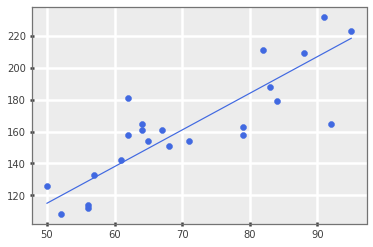

In [55]:
slope = 2.3

x = np.asarray(sorted(np.random.randint(50, 100+1, 23)))
y = np.asarray([stats.poisson(v).rvs()*slope for v in x]).astype(int)
data = pd.DataFrame({'x':x, 'y':y})
plt.scatter(x, y)

true_regression_line = slope * x

plt.plot(x, true_regression_line)

In [53]:
with pm.Model() as model:
    # specify glm and pass in data. The resulting linear model, its likelihood and
    # and all its parameters are automatically added to our model.
    glm = pm.glm.GLM.from_formula('y ~ x', data)
    trace = pm.sample(3000, chains=2, target_accept=0.9) # draw 3000 posterior samples using NUTS sampling

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, x, Intercept]
Sampling 2 chains: 100%|██████████| 7000/7000 [00:09<00:00, 754.17draws/s]


/Users/balarsen/miniconda3/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 504x504 with 0 Axes>

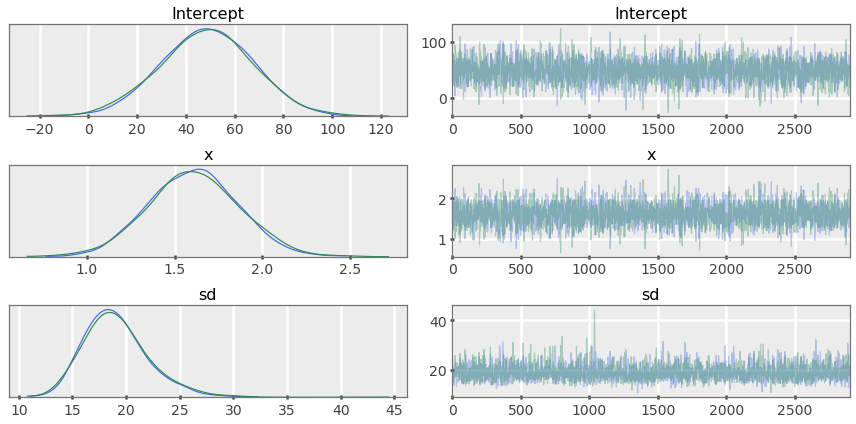

In [33]:

plt.figure(figsize=(7, 7))
pm.traceplot(trace[100:])
plt.tight_layout();



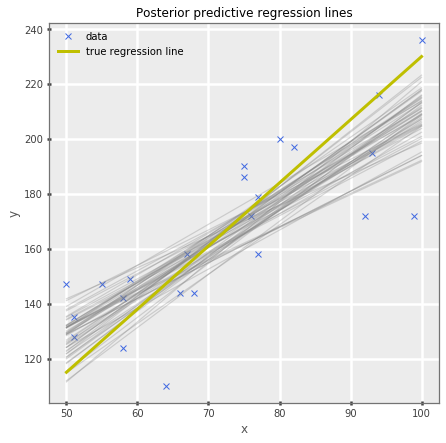

In [45]:
plt.figure(figsize=(7, 7))
plt.plot(x, y, 'x', label='data')

for i in np.random.randint(100, len(trace), 50):
    plt.plot(x, trace['Intercept'][i] + trace['x'][i]*x, c='grey', alpha=0.3)



plt.plot(x, true_regression_line, label='true regression line', lw=3., c='y')

plt.title('Posterior predictive regression lines')
plt.legend(loc=0)
plt.xlabel('x')
plt.ylabel('y');

In [47]:
family=pm.glm.families.Poisson()

In [56]:
with pm.Model() as model:
    # specify glm and pass in data. The resulting linear model, its likelihood and
    # and all its parameters are automatically added to our model.
    glm = pm.glm.GLM.from_formula('y ~ x', data, family=pm.glm.families.Poisson())
    trace = pm.sample(3000, chains=2, target_accept=0.9) # draw 3000 posterior samples using NUTS sampling

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mu, x, Intercept]
Sampling 2 chains: 100%|██████████| 7000/7000 [00:12<00:00, 571.80draws/s]


/Users/balarsen/miniconda3/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 504x504 with 0 Axes>

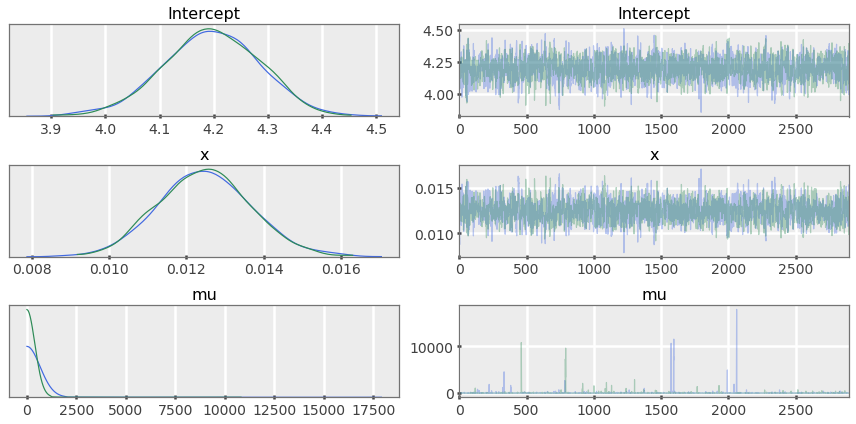

In [57]:

plt.figure(figsize=(7, 7))
pm.traceplot(trace[100:])
plt.tight_layout();



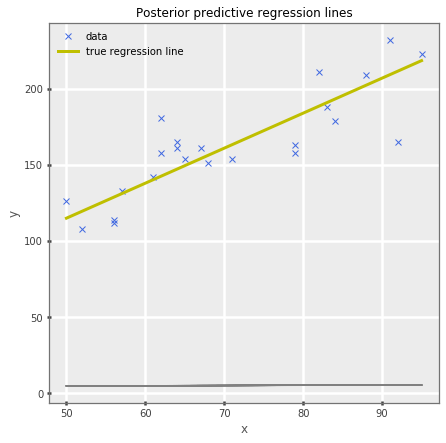

In [58]:
plt.figure(figsize=(7, 7))
plt.plot(x, y, 'x', label='data')

for i in np.random.randint(100, len(trace), 50):
    plt.plot(x, trace['Intercept'][i] + trace['x'][i]*x, c='grey', alpha=0.3)



plt.plot(x, true_regression_line, label='true regression line', lw=3., c='y')

plt.title('Posterior predictive regression lines')
plt.legend(loc=0)
plt.xlabel('x')
plt.ylabel('y');